In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import time

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [6]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
train_images.shape

(60000, 28, 28)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
start_time=time.time()

model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

train_time = time.time()-start_time
train_time

Epoch 1/10
750/750 [==============================] - 73s 92ms/step - loss: 0.5813 - accuracy: 0.7856 - val_loss: 0.4005 - val_accuracy: 0.8517
Epoch 2/10
750/750 [==============================] - 72s 96ms/step - loss: 0.3638 - accuracy: 0.8674 - val_loss: 0.3350 - val_accuracy: 0.8767
Epoch 3/10
750/750 [==============================] - 84s 112ms/step - loss: 0.3120 - accuracy: 0.8853 - val_loss: 0.3171 - val_accuracy: 0.8837
Epoch 4/10
750/750 [==============================] - 90s 120ms/step - loss: 0.2780 - accuracy: 0.8982 - val_loss: 0.2960 - val_accuracy: 0.8931
Epoch 5/10
750/750 [==============================] - 94s 126ms/step - loss: 0.2542 - accuracy: 0.9064 - val_loss: 0.2840 - val_accuracy: 0.8956
Epoch 6/10
750/750 [==============================] - 92s 123ms/step - loss: 0.2325 - accuracy: 0.9150 - val_loss: 0.2795 - val_accuracy: 0.9004
Epoch 7/10
750/750 [==============================] - 93s 124ms/step - loss: 0.2162 - accuracy: 0.9213 - val_loss: 0.2603 - val_accu

867.8965361118317

In [14]:
loss, acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 16ms/step - loss: 0.2725 - accuracy: 0.9092


In [12]:
model_name = 'model_3.2_CNN_MNISTFashion'

In [15]:
# Save the model
model.save(model_name)

INFO:tensorflow:Assets written to: model_3.2_CNN_MNISTFashion\assets


INFO:tensorflow:Assets written to: model_3.2_CNN_MNISTFashion\assets


In [13]:
model = load_model(model_name)

1/1 [==============================] - 0s 323ms/step


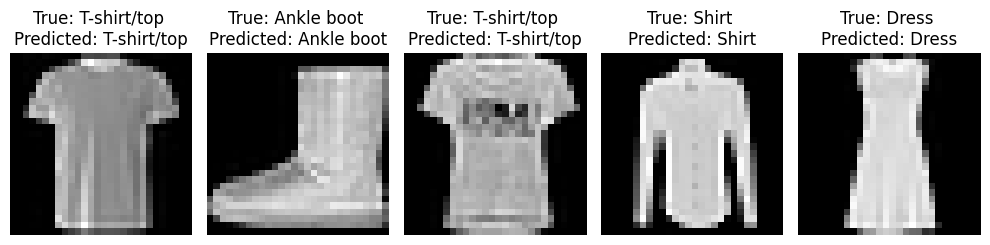

In [15]:
# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import cv2

def preprocess_image(image_path):
  
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title("Original Image")
  plt.imshow(image_rgb)
  plt.show()


  img = load_img(image_path, grayscale=True, target_size=(28, 28))
  img_array = img_to_array(img)
  img_array = 255 - img_array
  plt.title("Preprocessed Grayscale Image")
  plt.imshow(img_array, cmap='gray')
  img_array = img_array.reshape((1, 28, 28, 1))

  return img_array / 255.0

C:\Users\arlik\AppData\Local\Temp\ipykernel_13084\581670703.py:26: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((300, 300), Image.ANTIALIAS)


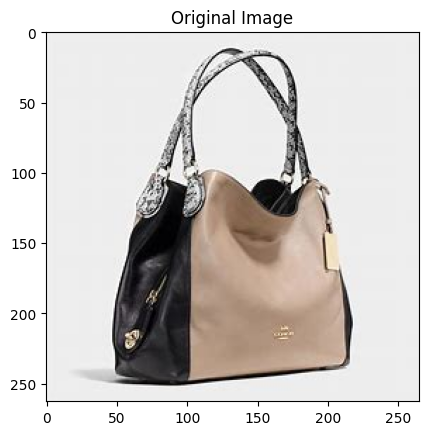

C:\users\arlik\appdata\local\programs\python\python39\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
Prediction Time : 0.18099284172058105


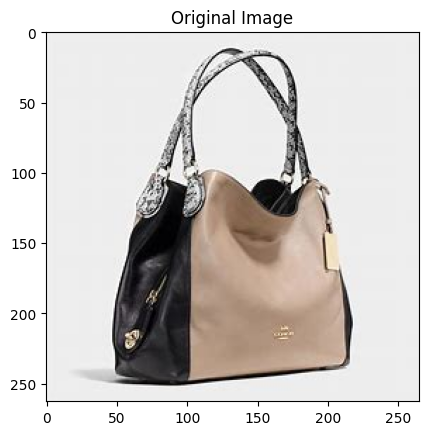

1/1 [==============================] - 0s 67ms/step
Prediction Time : 0.17596912384033203


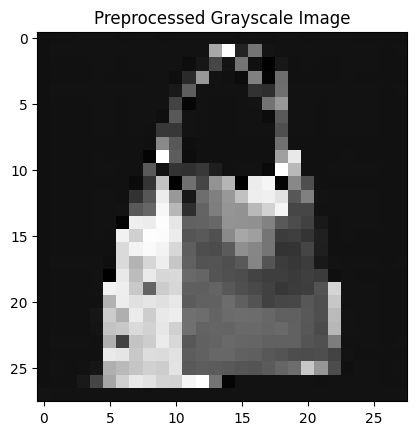

In [17]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import ImageTk, Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


def predict_disease(image_path):
    try:
        x = preprocess_image(image_path)
        start_time = time.time()
        predictions = model.predict(x)
        pred_time = time.time()-start_time
        print(f"Prediction Time : {pred_time}")
        predicted_label = class_labels[np.argmax(predictions)]
        return predicted_label
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred during prediction: {str(e)}")
        return "Unknown"

def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            img = Image.open(file_path)
            img = img.resize((300, 300), Image.ANTIALIAS)
            img = ImageTk.PhotoImage(img)
            image_label.config(image=img)
            image_label.image = img
            predicted_label = predict_disease(file_path)
            result_label.config(text=f"Predicted Label: {predicted_label}")
            predicted_label, prediction_time = predict_disease(file_path)
            result_label.config(text=f"Predicted Label: {predicted_label}, Prediction Time: {prediction_time:.4f} seconds")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Creating the main application window
root = tk.Tk()
root.title("Fashion prediction")

# Creating the GUI components
select_button = tk.Button(root, text="Select Image", command=select_image)
select_button.pack(pady=10)

image_label = tk.Label(root)
image_label.pack(pady=10)

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

# Running the main event loop
root.mainloop()